Edge Detection

***Sobel*** vs ***Canny*** algorithms

*for **image classification** - CIFAR10 dataset*

*kNN and Nearest Centroid Classifiers*

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import cv2


# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Reshape and Normalize Data
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32) 


def apply_edge_detection(image, method='sobel'): # if you want to switch to canny, change this line from method='sobel' to method='canny'
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)
    
    if method == 'sobel':
        sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
        sobel_edges = cv2.magnitude(sobel_x, sobel_y)
        return sobel_edges
    elif method == 'canny':
        blurred_image = (blurred_image * 255).astype(np.uint8)
        canny_edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)
        return canny_edges
    

def preprocess_with_edge_detection(data, method='sobel'):# if you want to switch to canny, change this line from method='sobel' to method='canny'
    processed_data = []
    for image in data:
        edges = apply_edge_detection(image, method=method)
        edges = edges
        processed_data.append(edges)
    
    processed_data = np.array(processed_data).astype(np.float32)
    processed_data = processed_data.reshape((processed_data.shape[0], -1))
    return processed_data

x_train = preprocess_with_edge_detection(x_train, method='sobel')# if you want to switch to canny, change this line from method='sobel' to method='canny'
x_test = preprocess_with_edge_detection(x_test, method='sobel')# if you want to switch to canny, change this line from method='sobel' to method='canny'


# Name Classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**k Nearest Neighbor Classifier** 

*(choose value for k before you run)*

kNN with k = 3 achieved an accuracy score of 0.3083

              precision    recall  f1-score   support

    airplane       0.32      0.44      0.37      1000
  automobile       0.36      0.40      0.38      1000
        bird       0.26      0.41      0.32      1000
         cat       0.21      0.24      0.22      1000
        deer       0.21      0.39      0.27      1000
         dog       0.34      0.17      0.23      1000
        frog       0.33      0.33      0.33      1000
       horse       0.63      0.24      0.34      1000
        ship       0.46      0.35      0.40      1000
       truck       0.48      0.11      0.18      1000

    accuracy                           0.31     10000
   macro avg       0.36      0.31      0.30     10000
weighted avg       0.36      0.31      0.30     10000



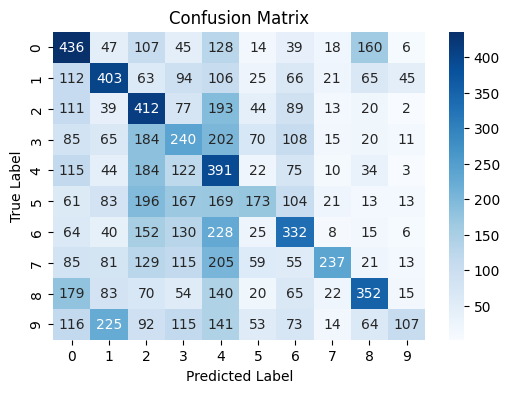

In [5]:
k = 3 # choose k here

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train.ravel())
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"kNN with k = {k} achieved an accuracy score of {accuracy}\n")

print(classification_report(y_test, y_pred, target_names=class_names))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



**Nearest Centroid Classifier**

Nearest Centroid algorithm achieved an accuracy score of  0.2756 

              precision    recall  f1-score   support

    airplane       0.33      0.38      0.36      1000
  automobile       0.25      0.32      0.28      1000
        bird       0.29      0.41      0.34      1000
         cat       0.18      0.09      0.12      1000
        deer       0.26      0.27      0.26      1000
         dog       0.27      0.15      0.19      1000
        frog       0.30      0.19      0.23      1000
       horse       0.26      0.33      0.29      1000
        ship       0.32      0.31      0.31      1000
       truck       0.25      0.32      0.28      1000

    accuracy                           0.28     10000
   macro avg       0.27      0.28      0.27     10000
weighted avg       0.27      0.28      0.27     10000



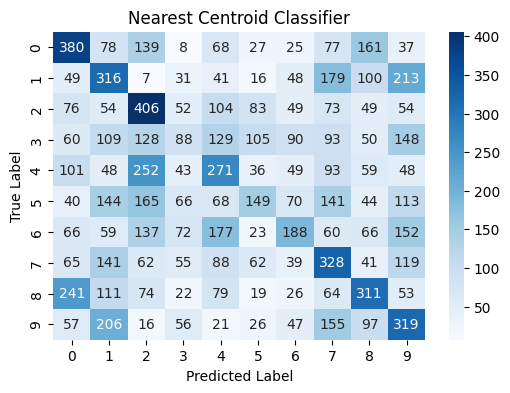

In [6]:
clf = NearestCentroid()
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Nearest Centroid algorithm achieved an accuracy score of ", accuracy, "\n");
print(classification_report(y_test, y_pred, target_names=class_names))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Nearest Centroid Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
